<a href="https://colab.research.google.com/github/Deepaksisothiya/Hospital-Emergency-Room-Dashboard/blob/main/Weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Create a sample weather.csv file automatically
import pandas as pd
import numpy as np

# Random data banana
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
temperature = np.random.normal(28, 5, len(dates))
humidity = np.random.normal(65, 10, len(dates))
precipitation = np.random.exponential(2, len(dates))

df = pd.DataFrame({
    'Date': dates,
    'Temperature': np.round(temperature, 1),
    'Humidity': np.round(humidity, 1),
    'Precipitation': np.round(precipitation, 1)
})

# Kuch missing values add karte hain
for col in ['Temperature', 'Humidity', 'Precipitation']:
    df.loc[np.random.choice(df.index, 10, replace=False), col] = np.nan

# CSV file save karna
df.to_csv('weather.csv', index=False)
print("✅ weather.csv file created successfully!")
df.head()


✅ weather.csv file created successfully!


,Date,Temperature,Humidity,Precipitation
0,2023-01-01,30.5,61.0,0.0
1,2023-01-02,27.3,67.2,4.9
2,2023-01-03,31.2,65.1,0.3
3,2023-01-04,35.6,66.0,1.7
4,2023-01-05,26.8,57.3,0.6


         Date  Temperature  Humidity  Precipitation
0  2023-01-01         30.5      61.0            0.0
1  2023-01-02         27.3      67.2            4.9
2  2023-01-03         31.2      65.1            0.3
3  2023-01-04         35.6      66.0            1.7
4  2023-01-05         26.8      57.3            0.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Temperature    355 non-null    float64
 2   Humidity       355 non-null    float64
 3   Precipitation  355 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB
None

--- Descriptive Stats ---
Temperature -> Mean: 28.11397260273973  Median: 28.3  Std: 4.737694584062182
Humidity -> Mean: 64.76794520547946  Median: 64.5  Std: 10.21892080178538
Precipitation -> Mean: 2.0835616438356164  Median: 1.6  Std: 2.0580622418686754

---

/tmp/ipython-input-3863752912.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Fill missing values


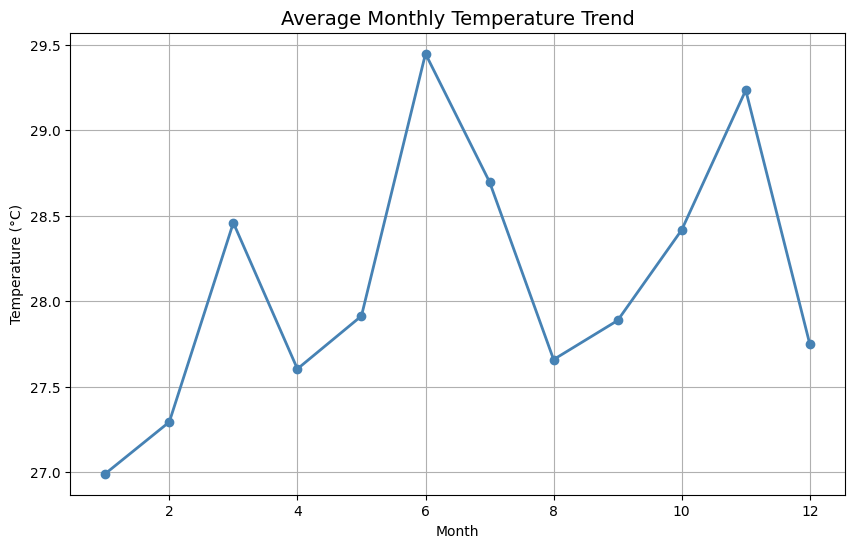

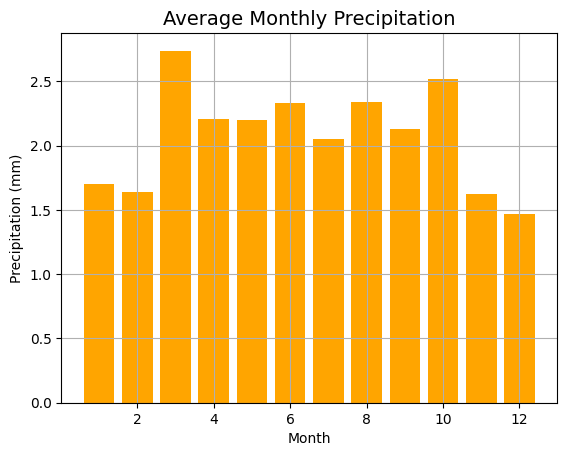

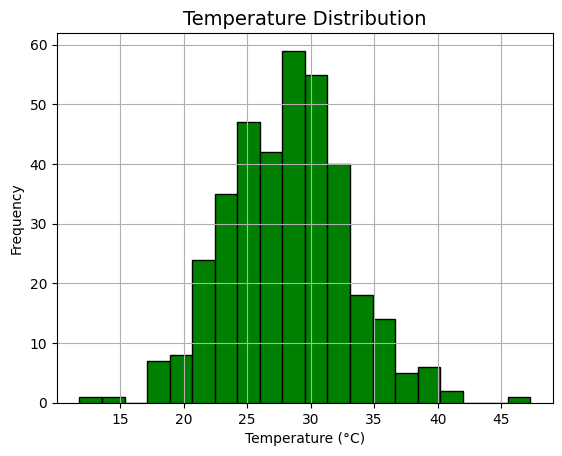


Extreme Hot Days:
           Date  Temperature  Humidity  Precipitation  Month
113 2023-04-24         40.3      95.8            0.0      4
125 2023-05-06         39.0      64.9            8.3      5
179 2023-06-29         41.6      40.3            1.7      6
209 2023-07-29         47.3      73.3            4.2      7
220 2023-08-09         39.6      67.5            0.3      8

Extreme Rainy Days:
           Date  Temperature  Humidity  Precipitation  Month
75  2023-03-17         32.1      68.8            8.8      3
87  2023-03-29         29.6      74.6            7.1      3
118 2023-04-29         33.7      67.0           12.4      4
125 2023-05-06         39.0      64.9            8.3      5
138 2023-05-19         32.1      70.6            8.8      5


In [5]:
# Step 2: Weather Data Analysis using Pandas, NumPy, and Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Inspect Data
df = pd.read_csv("weather.csv")
print(df.head())
print(df.info())

# 2. Data Cleaning
df = df.fillna(method='ffill')  # Fill missing values
df['Date'] = pd.to_datetime(df['Date'])

# 3. Descriptive Statistics with NumPy
temperature = df['Temperature'].to_numpy()
humidity = df['Humidity'].to_numpy()
precipitation = df['Precipitation'].to_numpy()

print("\n--- Descriptive Stats ---")
print("Temperature -> Mean:", np.mean(temperature), " Median:", np.median(temperature), " Std:", np.std(temperature))
print("Humidity -> Mean:", np.mean(humidity), " Median:", np.median(humidity), " Std:", np.std(humidity))
print("Precipitation -> Mean:", np.mean(precipitation), " Median:", np.median(precipitation), " Std:", np.std(precipitation))

# 4. Monthly Analysis
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')[['Temperature', 'Humidity', 'Precipitation']].mean()
print("\n--- Monthly Averages ---")
print(monthly_avg)

# 5. Visualizations
plt.figure(figsize=(10,6))
plt.plot(monthly_avg.index, monthly_avg['Temperature'], color="steelblue", marker="o", linewidth=2)
plt.title("Average Monthly Temperature Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

plt.bar(monthly_avg.index, monthly_avg['Precipitation'], color="orange")
plt.title("Average Monthly Precipitation", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.show()

plt.hist(df['Temperature'], bins=20, color="green", edgecolor="black")
plt.title("Temperature Distribution", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 6. Identify Extreme Weather
extreme_hot = df[df['Temperature'] > (np.mean(temperature) + 2*np.std(temperature))]
extreme_rain = df[df['Precipitation'] > (np.mean(precipitation) + 2*np.std(precipitation))]

print("\nExtreme Hot Days:\n", extreme_hot.head())
print("\nExtreme Rainy Days:\n", extreme_rain.head())
